<div align="center">
    <h1>Aprendizaje automático</h1>
    <h3>Fundamentos y aplicaciones en meteorología del espacio</h3>
    <h4>TP1 - Federico Iza</h4>
</div>

In [1]:
import pandas as pd
from tp1_settings import *
import matplotlib.pyplot as plt
from utils.plot import config_plots
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
import tensorflow as tf

2022-08-10 14:55:41.158667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-10 14:55:41.158687: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%matplotlib inline
config_plots()

# Radar Signal Classification

## Data Acquisition

In [3]:
df = pd.read_csv('../data/ionosphere.data',
                 header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [5]:
df.shape

(351, 35)

In [6]:
col_names = []
for i in range(1, N_SIGNALS+1):
    for suffix in ['R', 'I']:
        col_names.append(f'F{str(i)}{suffix}')
col_names.append('Target')

df.columns = col_names

In [7]:
df.head()

,F1R,F1I,F2R,F2I,F3R,F3I,F4R,F4I,F5R,F5I,...,F13I,F14R,F14I,F15R,F15I,F16R,F16I,F17R,F17I,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Data Pre-processing

In [8]:
# Numerical data has to be used in ANNs
category_target = {'g': 1, 'b': 0}
df['Target'] = df['Target'].map(category_target)

In [9]:
df.head()

,F1R,F1I,F2R,F2I,F3R,F3I,F4R,F4I,F5R,F5I,...,F13I,F14R,F14I,F15R,F15I,F16R,F16I,F17R,F17I,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


## Feature Engineering

### Data Balance

In [10]:
data_balace = df['Target'].value_counts()
print(data_balace)

1    225
0    126
Name: Target, dtype: int64


In [11]:
# Remove data to balance dataset
counter = 99  # Remove the first 99 rows with target=1
df_aux = pd.DataFrame()
for idx, row in df.iterrows():
    if counter > 0:
        if row['Target'] == 1:
            counter -= 1
        else:
            df_aux = df_aux.append(row)
    else:
        df_aux = df_aux.append(row)

/tmp/ipykernel_2867123/3469566758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_aux.append(row)
/tmp/ipykernel_2867123/3469566758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_aux.append(row)
/tmp/ipykernel_2867123/3469566758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_aux.append(row)
/tmp/ipykernel_2867123/3469566758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_aux.append(row)
/tmp/ipykernel_2867123/3469566758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aux = df_a

In [12]:
df_aux.shape

(252, 35)

In [13]:
data_balace = df_aux['Target'].value_counts()
print(data_balace)

0.0    126
1.0    126
Name: Target, dtype: int64


## Data Preparation

In [14]:
features = df_aux.loc[:, df_aux.columns != 'Target']
target =  df_aux.loc[:, df_aux.columns == 'Target']

In [15]:
# Scaling analysis (if necessary)
print(features.min(), features.max())

F1R     0.0
F1I     0.0
F2R    -1.0
F2I    -1.0
F3R    -1.0
F3I    -1.0
F4R    -1.0
F4I    -1.0
F5R    -1.0
F5I    -1.0
F6R    -1.0
F6I    -1.0
F7R    -1.0
F7I    -1.0
F8R    -1.0
F8I    -1.0
F9R    -1.0
F9I    -1.0
F10R   -1.0
F10I   -1.0
F11R   -1.0
F11I   -1.0
F12R   -1.0
F12I   -1.0
F13R   -1.0
F13I   -1.0
F14R   -1.0
F14I   -1.0
F15R   -1.0
F15I   -1.0
F16R   -1.0
F16I   -1.0
F17R   -1.0
F17I   -1.0
dtype: float64 F1R     1.0
F1I     0.0
F2R     1.0
F2I     1.0
F3R     1.0
F3I     1.0
F4R     1.0
F4I     1.0
F5R     1.0
F5I     1.0
F6R     1.0
F6I     1.0
F7R     1.0
F7I     1.0
F8R     1.0
F8I     1.0
F9R     1.0
F9I     1.0
F10R    1.0
F10I    1.0
F11R    1.0
F11I    1.0
F12R    1.0
F12I    1.0
F13R    1.0
F13I    1.0
F14R    1.0
F14I    1.0
F15R    1.0
F15I    1.0
F16R    1.0
F16I    1.0
F17R    1.0
F17I    1.0
dtype: float64


## Modeling

In [16]:
(feats_train, feats_test,
 target_train, target_test) = train_test_split(features, target,
                                               test_size=TEST_SIZE)

In [17]:
input_size = feats_train.shape[1]  # Number of feat for training

In [18]:
# ANN architecture
model = Sequential()  # Instance the model

for i in range(N_LAYERS):  # Add layers
    model.add(Dense(units=N_NEURONS[i],  # Specify number of neurons
                    input_dim=input_size))  # Specify input size
    model.add(Activation(ACTIVATION_FUNCTIONS[i]))  # Add activation funcs

# Complile model
model.compile(loss='binary_crossentropy',  # Select loss function
              optimizer='rmsprop',  # Select optimizer
              metrics=[tf.keras.metrics.Accuracy()],  # Select metrics
              )

2022-08-10 14:55:42.863698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-10 14:55:42.863727: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-10 14:55:42.863747: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neuromancer): /proc/driver/nvidia/version does not exist
2022-08-10 14:55:42.863972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
history = model.fit(feats_train, target_train,
                    epochs=N_EPOCHS,  # Use 20 iterations
                    validation_split=VALIDATION_SPLIT,
                    verbose=2)

Epoch 1/30
5/5 - 1s - loss: 3.5594 - accuracy: 0.1375 - val_loss: 1.1085 - val_accuracy: 0.2195 - 580ms/epoch - 116ms/step
Epoch 2/30
5/5 - 0s - loss: 1.0214 - accuracy: 0.1063 - val_loss: 0.7496 - val_accuracy: 0.2195 - 24ms/epoch - 5ms/step
Epoch 3/30
5/5 - 0s - loss: 0.4467 - accuracy: 0.0875 - val_loss: 0.6191 - val_accuracy: 0.2195 - 36ms/epoch - 7ms/step
Epoch 4/30
5/5 - 0s - loss: 0.3665 - accuracy: 0.1187 - val_loss: 0.3582 - val_accuracy: 0.2439 - 34ms/epoch - 7ms/step
Epoch 5/30
5/5 - 0s - loss: 0.3250 - accuracy: 0.1312 - val_loss: 0.2322 - val_accuracy: 0.2439 - 30ms/epoch - 6ms/step
Epoch 6/30
5/5 - 0s - loss: 0.2940 - accuracy: 0.1500 - val_loss: 0.2383 - val_accuracy: 0.2439 - 50ms/epoch - 10ms/step
Epoch 7/30
5/5 - 0s - loss: 0.2630 - accuracy: 0.1750 - val_loss: 0.2066 - val_accuracy: 0.2439 - 26ms/epoch - 5ms/step
Epoch 8/30
5/5 - 0s - loss: 0.2430 - accuracy: 0.1875 - val_loss: 0.2024 - val_accuracy: 0.2439 - 24ms/epoch - 5ms/step
Epoch 9/30
5/5 - 0s - loss: 0.2333 -

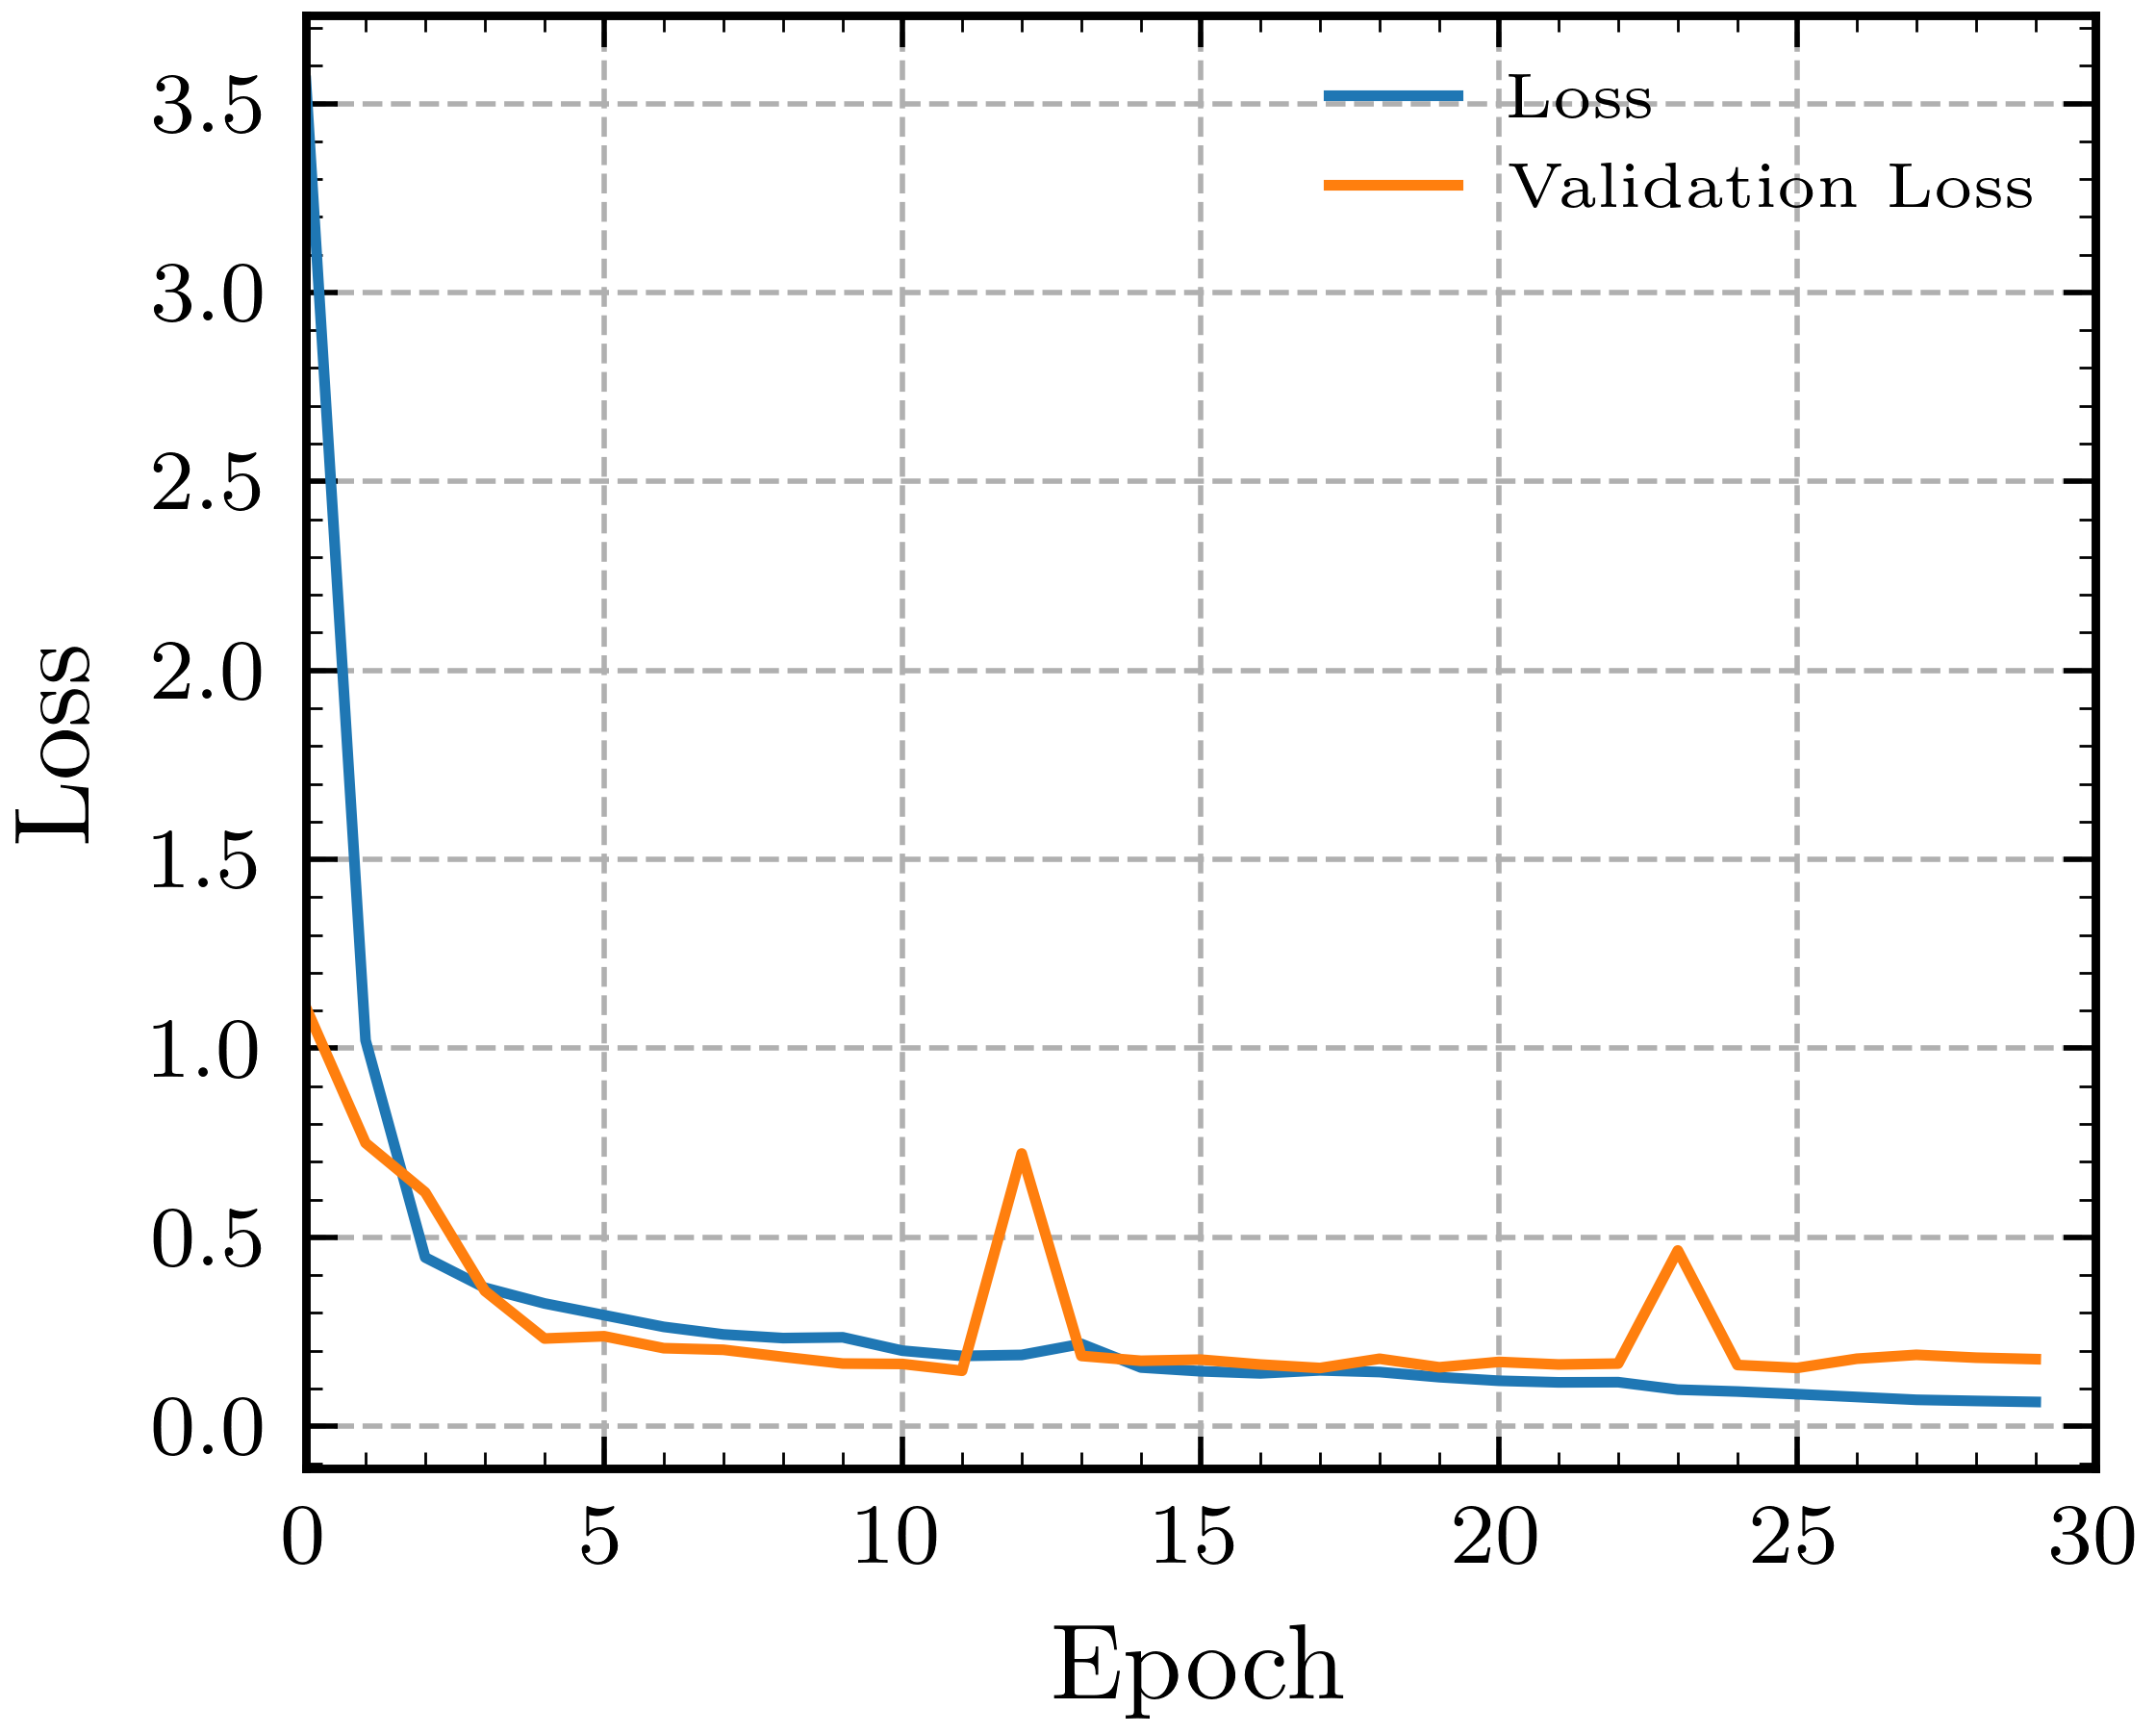

In [20]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(0, N_EPOCHS)
# ax.set_ylim(0, 5)

ax.plot(history.history['loss'], color='tab:blue',
        ls='-', lw=1, label='Loss')
ax.plot(history.history['val_loss'], color='tab:orange',
        ls='-',  lw=1, label='Validation Loss')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig1.pdf')
plt.show()

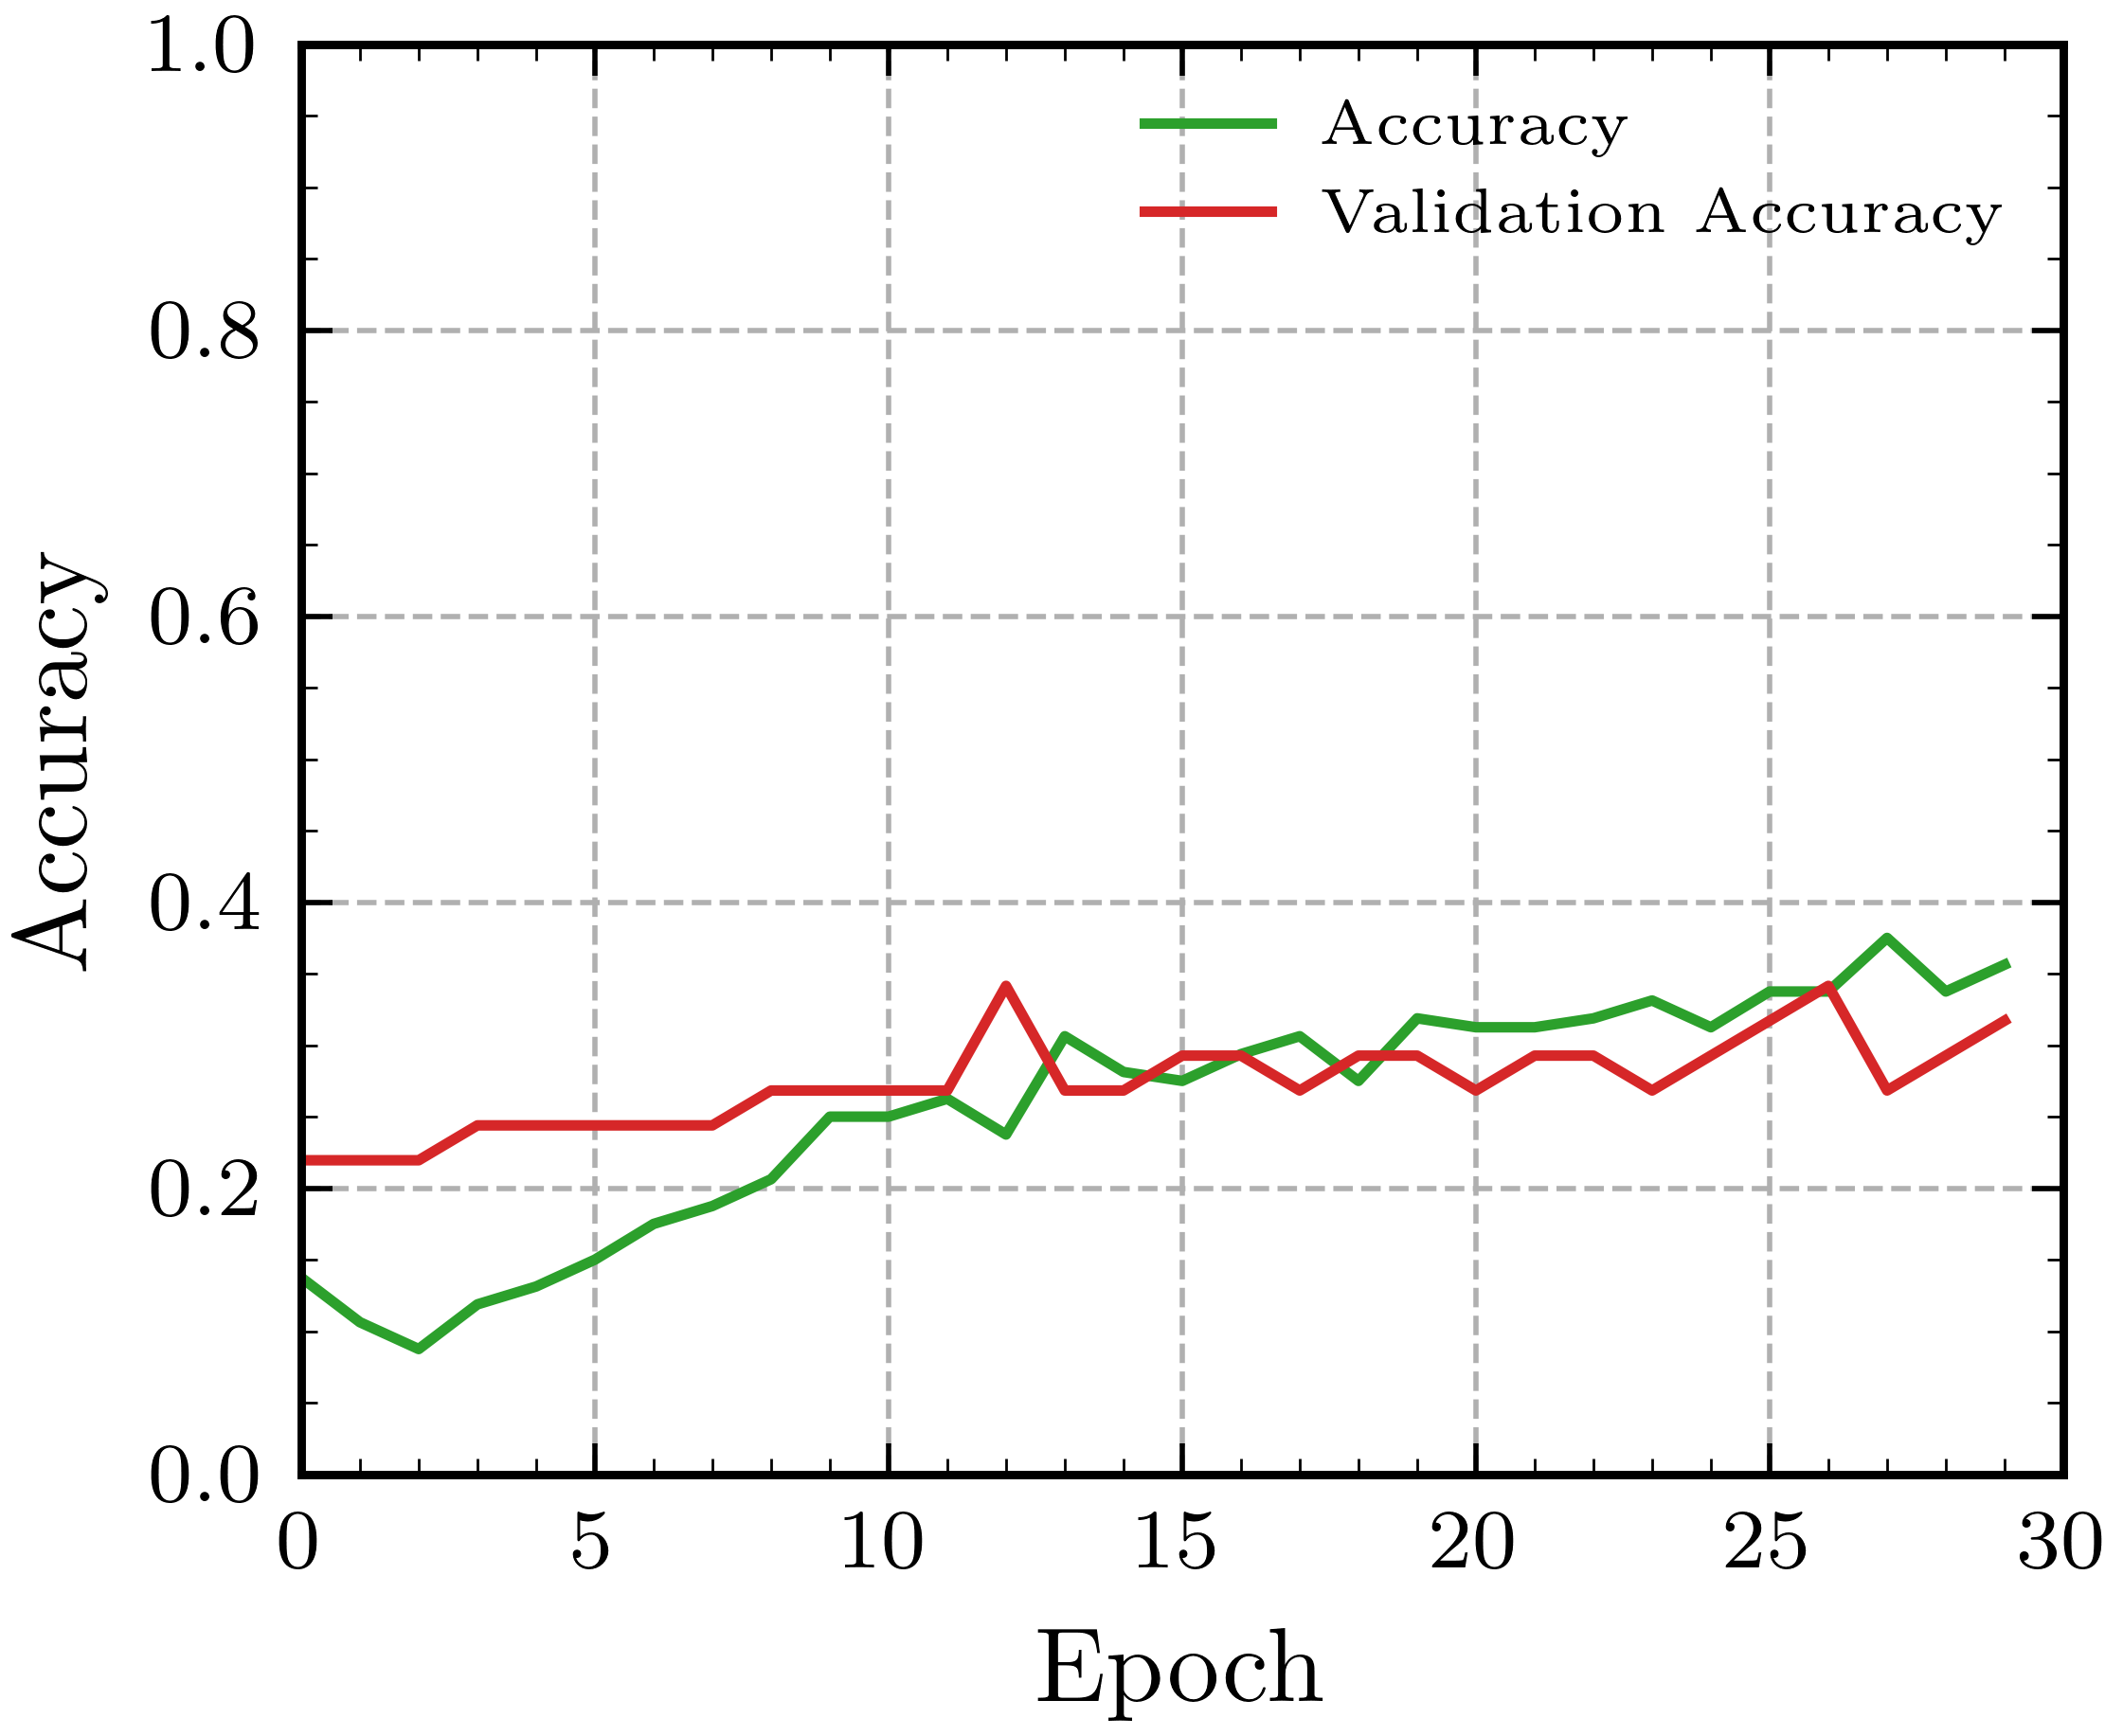

In [21]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_xlim(0, N_EPOCHS)
ax.set_ylim(0, 1)

ax.plot(history.history['accuracy'], color='tab:green',
        ls='-', lw=1, label='Accuracy')
ax.plot(history.history['val_accuracy'], color='tab:red',
        ls='-', lw=1, label='Validation Accuracy')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig2.pdf')
plt.show()

## Classification and Validation

In [22]:
y_pred = model.predict(feats_test)

2/2 [==============================] - 0s 2ms/step


In [23]:
cm = confusion_matrix(np.round(y_pred),
                      target_test,
                      labels=[0., 1.])

In [24]:
# Confusion matrix structure
# TN | FP
# FN | TP

print(cm)

[[21  4]
 [ 6 20]]


In [25]:
# print(np.diag(cm).sum() / cm.sum())
print(accuracy_score(target_test, np.round(y_pred)))

0.803921568627451


# CMEs Classification

Cada dato en CEMs.csv es una imagen que tiene información de la actividad solar (SunActivity), velocidad (vprop) y el origen (Origin).

In [26]:
# df = pd.read_csv('../data/CMEs.csv',
#                  )
# df.rename(columns={'vprop': 'Velocity'},
#           inplace=True)

In [27]:
# df